## 线性回归到神经网络

* 线性回归是最简单的神经网络形式。可以把神经网络看成是线性回归的一种扩展。

In [1]:
from IPython.display import Image
Image(url= "14.png")

## 线性回归的三种表现形式:方程，矩阵，神经网络图

$$z = b + \omega_1 x_1 + \omega_2 x_2 + ... + \omega_p x_p + \epsilon$$

其中:

$z$ 是因变量,需要预测的目标
$x_1, x_2, ..., x_p$ 是自变量,输入特征
$b$ 是截距项
$\omega_1, \omega_2, ..., \omega_p$ 是回归系数
$\epsilon$ 是误差项

模型的目标是找到一组参数,使得预测$\hat{z}$尽可能接近真实观测值z。
常见的训练方法是最小二乘法,通过最小化所有样本的平方误差来求解最优参数。

多元线性回归广泛用于数值预测任务,可以看作是最简单的机器学习模型之一。但表达能力有限,只能表示线性关系。


* 图解表达的好处

* 线性回归本质上就是一个单层神经网络。

In [7]:
Image(url= "output1.jpg")

In [8]:
Image(url= "191.jpg")
# 单样本例

### 单层神经网络前向传播的代码实现

* 简单代码实现

torch.tensor
torch.mv


In [2]:
import torch
import numpy as np

In [4]:
# 通过torch.tensor()构建输入特征
# tensor(,dtype=torch.float32)
x=torch.tensor([[1.0,2.0,0.1],[3.0,4.0,0.2],[5.0,6.0,0.3]])
z=torch.tensor([2.0,3.0,5.0])
w=torch.tensor([1.0, 0.5, -0.5])

In [11]:
results=np.dot(x,w)
results

array([1.95, 4.9 , 7.85], dtype=float32)

In [12]:
def line0(x,w):
    return torch.mv(x,w)    # 也可以直接使用torch.mv(x,w)

In [13]:
line0(x,w)

tensor([1.9500, 4.9000, 7.8500])

* 通过torch.nn.Linear()函数构建隐藏层

torch.nn.Linear
output.weight

In [37]:
x=torch.tensor([[1.0,2,0.1],[3.0,4,0.2],[5,6,0.3]],dtype = torch.float32)
output=torch.nn.Linear(3,2) # （特征维度，层数），随机分配w
output(x)

tensor([[-0.9306, -0.1752],
        [-1.5866, -0.9083],
        [-2.2425, -1.6414]], grad_fn=<AddmmBackward0>)

In [29]:
output.weight# 权重矩阵，包含了隐藏层和输出层的权重

Parameter containing:
tensor([[0.2709, 0.4980, 0.0529]], requires_grad=True)

## 激活函数（从线性回归到神经网络的第一个扩展）

线性回归:

$$ y = \beta X + b $$

其中,$X$是输入特征,$y$是输出,$b$是偏置项,$\beta$是线性回归的参数。线性回归假设输入和输出之间是线性关系。

单层神经网络:

$$ y = f(X\beta + b) $$

其中$f$是一个非线性激活函数,如sigmoid。单层网络在线性回归基础上加了非线性变换。

多层神经网络:

$$ y = f_n(W_n...f_2(W_2f_1(W_1X+b_1)...)+b_n) $$

其中$W_i, b_i$表示每一层的权重和偏置,$f_i$表示激活函数。多层网络堆叠线性变换和非线性变换,能够拟合更复杂的函数。

从上式可以看出,线性回归是最简单的单层神经网络。随着层数的增加和非线性的引入,神经网络可以表示更加复杂的函数,拟合能力也越强。两者之间是渐进的关系。

In [14]:
Image(url= "17.jpg")

### 输出层的激活函数sigmoid——从回归到二分类



Sigmoid函数将实数映射到(0,1)区间,是一个S型的曲线。它的定义形式为:

$\sigma(x) = \frac{1}{1+e^{-x}}=\frac{e^x}{e^x+1}$

x为输入,$\sigma(x)$为Sigmoid激活函数的值。

Sigmoid函数的主要特点是:

取值范围在(0,1)之间
单调递增
曲线S形,与x轴相交于(0,0.5)
导数求解简单
存在梯度消失问题
Sigmoid函数广泛用于二分类神经网络中,将任意实数映射为0-1之间的概率。但目前由于梯度消失问题,在深层网络中已较少使用。


* 在神经网络的输出层加入Sigmoid激活函数,主要有以下目的:

1.将网络输出转换为概率
:__Sigmoid函数将实数映射到(0,1)区间,可将网络输出转换为概率值,表示预测的置信度。__ 这对于进行预测很有用。

2.实现二分类输出
:Sigmoid的输出区间为(0,1),可以直接用来表示二分类任务中的概率P(y=1|x)。值接近0表示预测第一类,接近1表示预测第二类。

3.定义binary cross entropy loss
:__Sigmoid可与binary cross entropy loss配合使用,构建二分类任务的loss函数,用于训练网络模型。__

4.提供可微分性
:Sigmoid函数可导,使得输出层也可导,便于使用梯度下降进行网络参数优化。

5.减少梯度消失
:相比tanh等激活函数,Sigmoid在正负饱和区的梯度更大,一定程度上减轻了梯度消失问题。

6.提升收敛性
:Sigmoid可强制网络输出在一个数值范围内,增强网络的收敛性。

总之,Sigmoid适合作为输出层激活函数,将网络输出转换为概率,定义loss函数,实现二分类,并一定程度上提升优化性能。但其梯度消失问题仍限制了网络层数的增长。

torch.sigmoid


In [2]:
import matplotlib.pyplot as plt

In [15]:
x=torch.tensor(range(-10,10),dtype = torch.float32)
y=torch.sigmoid(x)

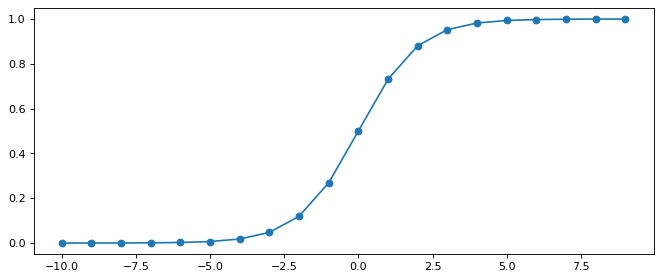

In [16]:
plt.figure(figsize = (10,4),dpi = 80)
plt.plot(x,y,"o-")

以Y轴0.5处划分上下两部分进行分类

* 单层二分类神经网络的前向过程的代码实现

In [35]:
x=torch.tensor([[1.0,2.0,0.1],[3.0,4.0,0.2],[5.0,6.0,0.3]],dtype=torch.float32)
z=torch.tensor([0,0,1],dtype=torch.float32)
w=torch.tensor([0.2451, 0.562, -1.3242],dtype=torch.float32)

def line1(x,w):
    h1=torch.mv(x,w)
    h1=torch.sigmoid(h1)
    output=torch.tensor([int(x) for x in h1 >=0.5],dtype=torch.float32)
    return output,h1

line1(x,w)


(tensor([1., 1., 1.]), tensor([0.7750, 0.9381, 0.9852]))

In [69]:
x=torch.tensor([[1.0,2.0],[3.0,4.0],[5.0,6.0]])
z=torch.tensor([0,0,1])

h1=torch.nn.Linear(2,1)
h1_out=h1(x)
h1_s_out=torch.sigmoid(h1_out)
h1_s_c_out=torch.tensor([int(x) for x in h1_s_out >=0.5],dtype=torch.float32)
h1_s_c_out

tensor([0., 0., 1.])

In [70]:
Image(url= "17.png")

In [108]:
x=torch.tensor([[1.0,2.0,0.1],[3.0,4.0,0.2],[5.0,6.0,0.3]])
z=torch.tensor([0,0,1],dtype=torch.float32)

h1=torch.nn.Linear(3,3)
h2=torch.nn.Linear(3,2)
h3=torch.nn.Linear(2,1)

h1_out=h1(x)
h2_out=h2(h1_out)
h3_out=h3(h2_out)

h3_s_out=torch.sigmoid(h3_out)
h3_s_c_out=torch.tensor([int(x) for x in h3_s_out >=0.5],dtype=torch.float32)
h3_s_c_out

tensor([0., 0., 1.])

In [ ]:

Image(url= "18.png")

## 神经元与隐藏层的增减（从线性回归到神经网络的第二个扩展）

* 神经元与隐藏层的增减的效果（chatgpt的回答）

在构建深度学习模型时,增加单层神经元数量和增加隐藏层数量这两种方法都可以增强网络的表达能力,但带来的效果有些差异:

1. 增加单层神经元数量,主要作用是提升该层对更多特征的学习表达能力。适合当前层特征不够情况。

2. 增加隐藏层数量,主要作用是堆叠更多的非线性变换,提升全网络的层次化特征学习能力。适合功能表达不足情况。

3. 增加单层神经元数量对网络宽度产生影响,而增加隐藏层对网络深度产生影响。

4. 单层神经元增多容易导致过拟合;而层数增多可以通过有效的预训练及正则化方法减轻过拟合。

5. 层数增多会使得训练时间加长,而单层神经元增加影响较小。

综上,增多神经元数量的效果局限在单层,而增加层数影响全网;当特征表示力不足时,可以适当加大单层宽度;当层次表示不够时,可以适当加深网络。需要根据具体情况选择最优的网络结构。

* 各层之间的衔接以及输出层


In [ ]:
Image(url= "19.png")

### 输出层的softmax函数-从回归到多分类

对于一个向量x = [x1, x2, ..., xn],其softmax函数定义为:

$$ softmax(x_i) = \frac{e^{x_i}}{\sum_{j=n} e^{x_j}} $$

即对每个元素xi:

$$ softmax(x_i) = \frac{e^{x_i}}{e^{x_1} + e^{x_2} + ... + e^{x_n}}$$

softmax函数的主要性质是:

将任意实数向量归一化为概率分布,范围在[0, 1]
概率和为1,即$\sum_{i=1}^n softmax(x_i) = 1$
保留了输入元素相对大小的关系

softmax函数通常被用在神经网络的输出层,具有以下目的和意义:

    1.将网络输出转换为概率分布,表示对各类别的预测概率。

    2.实现多分类任务,将类别预测问题建模为概率估计问题。

    3.定义多分类交叉熵损失函数,用于模型训练。

    4.提供预测结果,选择概率最大的类别作为预测输出。

    5.增加模型确定性,生成值域范围固定的概率输出。

    6.提供类别之间可比性,概率表示预测的置信度。

综上,softmax可将网络输出转换为概率,实现多分类,定义损失函数,最终用于类别预测,这是它被广泛应用于神经网络输出层的主要原因。



In [3]:
z=torch.tensor([1010,1000,990],dtype=torch.float32)# 注意，在pytorch中计算softmax的时候，张量必须为小数，不能为int类型.需要提前转化好
torch.softmax(z,dim=0)

tensor([9.9995e-01, 4.5398e-05, 2.0611e-09])

dim的作用：
dim=1: Softmax 运算在每一行上，结果是每一行的元素之和为 1。
dim=0: Softmax 运算在每一列上，结果是每一列的元素之和为 1

In [7]:
z

tensor([1010., 1000.,  990.])

In [5]:
x = torch.tensor([[1, 2, 3], [9, 5, 6]], dtype=torch.float32)
torch.softmax(x, dim=1) 

tensor([[0.0900, 0.2447, 0.6652],
        [0.9362, 0.0171, 0.0466]])

In [6]:
x

tensor([[1., 2., 3.],
        [9., 5., 6.]])

In [3]:
Image(url= "16.png")

## 激活函数（隐藏层）

* 隐藏层的激活函数主要有以下几个作用（chatgpt）:

1. 引入非线性:
激活函数的引入让网络可以拟合复杂的非线性函数,而不仅是简单的线性映射,这大大提高了模型的表达能力。

2. 定义输出范围:
不同的激活函数将输出值映射到不同的范围,如Sigmoid将实数映射到[0,1],tanh映射到[-1,1]。这为后续层提供合适数值范围的输入。

3. 实现层间转换:
激活函数实现了层与层之间的转换,一个层的输出通过激活函数成为下层的输入,完成信息的传递和转换。

4. 提供可训练参数:
激活函数的参数也可以加入训练,如批归一化层中的可学习参数,提高模型的表达能力。

5. 提高泛化能力:
激活函数增强了模型对未见样本的泛化能力,如ReLU具有稀疏化作用,减少了过拟合风险。

6. 提供梯度:
激活函数可导,为网络的反向传播提供了梯度,使网络可以通过梯度下降进行训练。

7. 提供正则化:
某些激活函数如ReLU也具有一定的正则化作用。

所以隐藏层的激活函数对网络性能有重要影响,它实现了层与层之间的非线性变换,是网络可以拟合复杂函数的关键。

* 机器学习中常用的激活函数

机器学习中常用的激活函数只有恒等函数（identity function），阶跃函数（sign），sigmoid
函数，ReLU，tanh，softmax这六种，其中Softmax与恒等函数几乎不会出现在隐藏层上，Sign、Tanh
几乎不会出现在输出层上，ReLU与Sigmoid则是两种层都会出现，并且应用广泛。在这里，我们将总结性声明一下输出层的g(z)与隐藏层
的h(z)之间的区别，以帮助大家获得更深的理解：

1. 虽然都是激活函数，但隐藏层和输出层上的激活函数作用是完全不一样的。输出层的激活函数
是为了让神经网络能够输出不同类型的标签而存在的。其中恒等函数用于回归，sigmoid函数用于
二分类，softmax用于多分类。换句说， 仅仅与输出结果的表现形式有关，与神经网络的效果
无关，也因此它可以使用线性的恒等函数。但隐藏层的激活函数就不同了，如我们之前尝试的
XOR，隐藏层上的激活函数 的选择会影响神经网络的效果，而线性的 是会让神经网络的结
构失效的。

2. 在同一个神经网络中，输出层与隐藏层的激活函数可以是不同的，并且在大多数运行回归和多分类的神经网络时，他们也的确是不同的。每层上的 可以是不同的，但是同一层上的激活函数必须一致。

* ReLU

ReLU(Rectified Linear Unit)是深度学习中最常用的激活函数之一,它的定义是:

$$ f(x) = \max(0, x) $$

即对输入x:

如果x>0, 输出x

如果x<=0, 输出0

ReLU激活函数的主要特点包括:

解决了梯度消失问题,因为其导数为1或0,不会产生梯度消失。
计算简单,仅仅是一个阈值判定,计算速度快。
在一定程度上引入了非线性,但保留了线性非饱和区。
比Sigmoid和Tanh收敛速度更快,模型训练效率高。
使模型更稀疏,有利于特征提取。
但也存在死亡神经元(dead neuron)问题,即部分神经元可能永远不会活化。
ReLU是目前最常用和最有效的激活函数之一。
综上,ReLU激活函数通过解决梯度消失问题,提高了深度网络的训练效率,被广泛应用在深度神经网络中。但也有一些缺点需要注意。


* 前向传播的标准实现形式

In [32]:
x=torch.tensor(range(-10,10),dtype = torch.float32)
y=torch.relu(x)

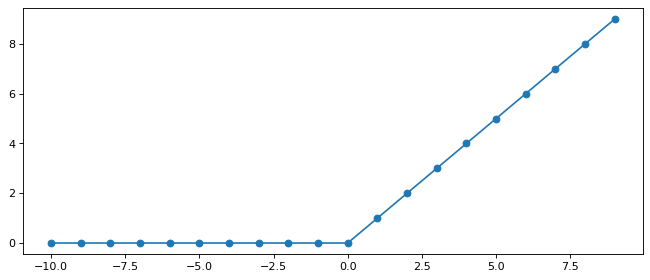

In [35]:
plt.figure(figsize = (10,4),dpi = 80)
plt.plot(x,y,"o-")

* 下面是一个标准torch神经网络定义例子，请尝试了解此例子，把前面我们的代码参照此例实现

In [17]:
import torch.nn as nn
from torch.nn import functional as F

torch.manual_seed(420)
X = torch.rand((500,20),dtype=torch.float32)
y = torch.randint(low=0,high=3,size=(500,1),dtype=torch.float32)

#继承nn.Modules类来定义神经网路的架构
class Model(nn.Module):
#init：定义类本身，__init__函数是在类被实例化的瞬间就会执行的函数
    def __init__(self,in_features=10,out_features=2):
        super(Model,self).__init__() #super(请查找这个类的父类，请使用找到的父类替换现在的类)
        self.linear1 = nn.Linear(in_features,13,bias=True) #输入层不用写，这里是隐藏层的第一层
        self.linear2 = nn.Linear(13,8,bias=True)
        self.output = nn.Linear(8,out_features,bias=True)

#__init__之外的函数，是在__init__被执行完毕后，就可以被调用的函数
    def forward(self, x):
        z1 = self.linear1(x)
        sigma1 = torch.relu(z1)
        z2 = self.linear2(sigma1)
        sigma2 = torch.sigmoid(z2)
        z3 = self.output(sigma2)
        sigma3 = F.softmax(z3,dim=1)
        return sigma3
        
input_ = X.shape[1] #特征的数目
output_ = len(y.unique()) #分类的数目
#实例化神经网络类
torch.manual_seed(420)
net = Model(in_features=input_, out_features=output_)
#在这一瞬间，所有的层就已经被实例化了，所有随机的w和b也都被建立好了
#前向传播
net(X)
net.forward(X)
#查看输出的标签
sigma = net.forward(X)
sigma.max(axis=1)
#查看每一层上的权重w和截距b
net.linear1.weight
net.linear1.bias

Parameter containing:
tensor([ 1.3508e-01,  1.5439e-01, -1.9350e-01, -6.8777e-02,  1.3787e-01,
        -1.8474e-01,  1.2763e-01,  1.8031e-01,  9.5152e-02, -1.2660e-01,
         1.4317e-01, -1.4945e-01,  3.4258e-05], requires_grad=True)

In [18]:
net.linear1.weight

Parameter containing:
tensor([[ 1.3656e-01, -1.3459e-01,  2.1281e-01, -1.7763e-01, -6.8218e-02,
         -1.5410e-01,  1.7245e-01,  8.3885e-02, -1.1153e-01, -1.7294e-01,
         -1.2947e-01, -4.3138e-02, -1.1413e-01,  1.6295e-01, -9.4082e-02,
         -1.4629e-01, -6.8982e-02, -2.1836e-01, -1.0859e-01, -1.2199e-01],
        [ 4.8127e-02,  1.8186e-01,  2.4149e-02, -1.3032e-01,  9.2056e-02,
         -9.5202e-02, -1.0584e-01, -4.2852e-02, -1.1669e-01,  2.4581e-02,
          1.8152e-01,  3.0500e-02,  1.3506e-01, -1.9425e-01, -1.7591e-01,
         -2.9751e-02,  2.0485e-04,  1.3957e-01, -1.9666e-01,  9.3293e-02],
        [-1.9192e-01,  3.6070e-02,  1.4778e-01,  3.0845e-02,  7.1393e-02,
          1.4217e-01,  2.2122e-01, -1.4032e-01,  7.3255e-02,  1.8409e-01,
          1.2716e-01, -2.0253e-01, -1.5509e-01, -2.1899e-01,  9.8980e-02,
          2.2123e-01, -2.1659e-01,  1.7880e-01, -2.0922e-01, -2.7275e-02],
        [ 1.8144e-01, -3.5166e-02,  2.4801e-02,  1.6299e-01, -1.8755e-01,
          5.6

## 神经网络的损失函数


* b站线性回归相关讲解视频

https://www.bilibili.com/video/BV1QM4y167oZ/?spm_id_from=333.788&vd_source=09af776e3fe3bbe20ff8249e4a9b1581


### 回归问题中的损失函数一般为均方误差(Mean Squared Error, MSE)

误差平方和损失函数(Mean Squared Error, MSE)是回归任务中常用的损失函数,其思想是计算预测值和真实值的平方差误差。

MSE 函数的表达式为:

$$ MSE=\frac{1}{n}\sum_{i=1}^{n}(y_{pred_{i}}-y_{true_{i}})^{2}$$

其中$n$是样本数量,$y_{pred_{i}}$是预测值,$y_{true_{i}}$是真实标签。

MSE的主要特点:

- 易于计算,代码实现简单
- 对大误差VERY敏感,能惩罚大的误差
- 容易落入局部最小值

在PyTorch中,MSE损失函数的实现代码如下:
这里直接使用PyTorch内置的MSELoss计算了预测值和真实值之间的MSE。

In [2]:
import torch
import torch.nn as nn

# 预测值 
y_pred = torch.tensor([2, 3, 4], dtype = torch.float32)  

# 真实值
y_true = torch.tensor([1, 3, 5], dtype = torch.float32)

# 计算 MSE
criterion = nn.MSELoss()
loss = criterion(y_pred, y_true)

print(loss)

tensor(0.6667)


### 二分类问题中的交叉熵损失函数(Binary Cross Entropy, BCE)

用来衡量两个概率分布之间的距离,通常用来训练二分类神经网络。

其表达式为:  

$$ BCE(y, \hat{y}) = - (y \log \hat{y} + (1-y) \log (1-\hat{y})) $$

这里$y$是真实标签,$ŷ$是模型预测概率。

BCE的主要特点:

- 输出使用Sigmoid函数,范围在[0,1]表示概率
- 对正负样本同时起作用
- 易于求导,便于梯度下降
- 输出非0即1时效果最好

在PyTorch中,BCE损失函数代码实现:

这里直接调用PyTorch的BCELoss来计算二分类交叉熵损失。

所以BCE通过概率距离度量二分类效果,实现了简单而有效的二元交叉熵损失函数。

In [3]:
# 预测概率 
y_pred = torch.tensor([0.2, 0.7])  

# 真实标签
y_true = torch.tensor([0, 1], dtype = torch.float32) 

# 计算BCE
criterion = nn.BCELoss()  
loss = criterion(y_pred, y_true)

print(loss)

tensor(0.2899)


### 多类交叉熵损失函数(Multi-class Cross Entropy)

对于多分类问题,我们通常使用多类交叉熵损失函数(Multi-class Cross Entropy)。

其计算公式为:

$$ BCE(y, \hat{y}) = - \sum_{c=1}^My_{o,c}\log(\hat{y}_{o,c}) $$

这里$y_o$是onehot编码的真实标签,$\hat{y}_o$是模型输出的概率,M是类别数量。

多类交叉熵的工作原理是:

1. 将真实标签转化为onehot向量,只有对应类别索引位置为1。

2. 模型通过Softmax输出每个类别的预测概率。

3. 交叉熵度量预测概率分布与onehot标签分布的距离。

4. 最小化此距离等效于最大化对的类别概率。

PyTorch中多类交叉熵损失函数的实现代码:

所以多类交叉熵适合多分类问题,通过onehot编码 label 并最小化预测概率与真实label 分布之间的距离来训练模型。

In [4]:
# 预测概率
y_pred = torch.tensor([[0.1, 0.2, 0.7],
                       [0.3, 0.5, 0.2]])
# 真实标签 
y_true = torch.tensor([2, 0]) #由于交叉熵损失需要将标签转化为独热形式，因此不接受浮点数作为标签的输入

# 计算多类交叉熵  
criterion = nn.CrossEntropyLoss()
loss = criterion(y_pred, y_true)
print(loss)

tensor(0.9539)
